In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import time

In [2]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [4]:
data = df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']]
target = df['diagnosis']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 1)

Using cross validation to find an accurary to reference and compare later

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81395349 0.90697674 0.90697674 0.90697674 0.88372093 0.95348837
 0.85714286 0.92857143 0.92857143 0.83333333]


In [9]:
round(np.mean(score)*100, 2)

89.2

The accuracy found through cross validation using KNN method is 89.2

In [10]:
clf = DecisionTreeClassifier(random_state = 42)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.88372093 0.90697674 0.93023256 0.97674419 0.93023256 0.90697674
 0.85714286 0.92857143 0.92857143 0.78571429]


In [11]:
round(np.mean(score)*100, 2)

90.35

The accuracy found through cross validation using Decision Tree method is 90.35

# Decision Tree model

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42) 
time_0 = time.time()
dt.fit(x_train, y_train)
print('Training time: {0}'.format(time.time() - time_0))
dt

Training time: 0.003989458084106445


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [13]:
y_pred = dt.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, y_pred) * 100, 2)

87.41

The accuracy of the model is 87.41

<b>Adjusting hyperparameters to achieve better accuracy</b>

In [15]:
def decTreeScore2(crit = 'gini',  maxDepth = None, minSamples = 1, minSplit = 2, maxLeafNodes = None):
    dect = DecisionTreeClassifier(criterion = crit, max_depth = maxDepth, 
                                  min_samples_leaf = minSamples, min_samples_split = minSplit, 
                                  max_leaf_nodes = maxLeafNodes, random_state= 42)
    dect.fit(x_train, y_train)
    accuracy = accuracy_score(y_test, dect.predict(x_test))
    print (round(accuracy * 100,2))
    return round(accuracy * 100, 2)

In [16]:
decTreeScore2(crit = 'entropy')

87.41


87.41

Model using 'entropy' crit has the higher accuracy compared to that using 'gini' crit

In [17]:
for i in np.arange(1, 20, 1):
    print(i) 
    decTreeScore2(maxDepth = i)

1
86.01
2
83.92
3
86.01
4
88.81
5
87.41
6
88.81
7
86.71
8
87.41
9
87.41
10
87.41
11
87.41
12
87.41
13
87.41
14
87.41
15
87.41
16
87.41
17
87.41
18
87.41
19
87.41


Max-depth = 4 or 6 give the highest accuracy which is equal to the accuracy of the model using default max_depth = None

In [18]:
for i in np.arange(1, 20, 1):
    print(i)
    decTreeScore2(minSamples = i)

1
87.41
2
88.11
3
88.11
4
88.81
5
86.01
6
86.01
7
86.01
8
83.92
9
83.92
10
85.31
11
85.31
12
85.31
13
85.31
14
85.31
15
85.31
16
85.31
17
85.31
18
85.31
19
86.01


min_samples_leaf = 2, 3 or 4 give the highest accuracy

In [19]:
for i in np.arange(2, 30,1):
    print(i)
    decTreeScore2(minSplit = i)

2
87.41
3
88.81
4
88.81
5
91.61
6
91.61
7
90.91
8
91.61
9
90.91
10
88.81
11
89.51
12
88.81
13
88.81
14
88.81
15
88.81
16
88.81
17
88.81
18
88.81
19
88.81
20
88.81
21
88.81
22
88.11
23
84.62
24
84.62
25
84.62
26
83.22
27
83.22
28
83.22
29
83.22


min_samples_splits = 5, 6 or 8 gives the highest accuracy

In [20]:
for i in np.arange(2, 20,1):
    print(i)
    decTreeScore2(maxLeafNodes = i)

2
86.01
3
86.01
4
86.01
5
83.92
6
84.62
7
88.11
8
88.11
9
87.41
10
88.11
11
88.11
12
88.81
13
88.81
14
90.91
15
90.21
16
90.21
17
88.11
18
88.11
19
88.11


max_leaf_nodes = 14, 15 or 16 give the highest accuracy

In [21]:
dt2 = DecisionTreeClassifier(min_samples_split = 5, random_state = 42)
dt2.fit(x_train, y_train)
y_pred_2 = dt2.predict(x_test)
round(accuracy_score(y_test, y_pred_2) * 100, 2)

91.61

In [22]:
decTreeScore2(minSplit = 5)

91.61


91.61

<b>Visualize the decision tree</b>

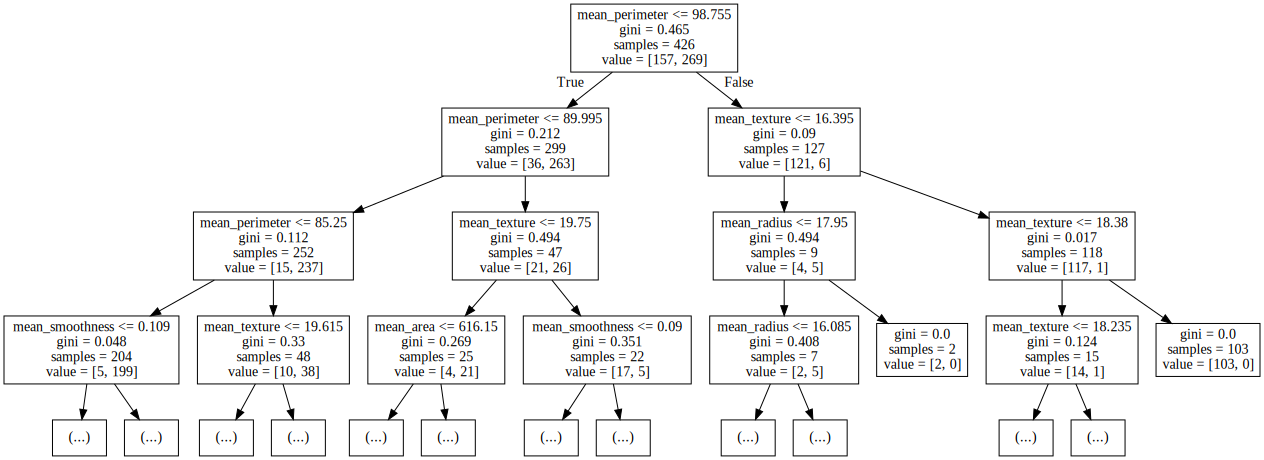

In [23]:
from sklearn import tree
import graphviz
from graphviz import Source
Source(tree.export_graphviz(dt2, out_file=None, feature_names= x_train.columns, max_depth = 3))